In [1]:
%matplotlib inline
# %gui qt
# from guidata import qthelpers
# %matplotlib
# %matplotlib notebook
import sys
import matplotlib
import numpy as np
import scipy
# import pandas as pd
import matplotlib.pyplot as plt
import cluster_helper.cluster
import TH_Classify_bias_correct as TH_Classify
import TH_ClassifyTriangle
import ram_data_helpers
import SfN_2016.create_sfn_2016_figs
# from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, iplot_mpl
# from plotly.graph_objs import *
# import plotly.tools as tls
# import RAM_plotBrain
# import behavioral.perf_over_time
# init_notebook_mode()

In [2]:
# import SfN_2016.create_sfn_2016_figs
reload(SfN_2016.create_sfn_2016_figs)
acc, perc, hist = SfN_2016.create_sfn_2016_figs.accuracy_by_conf()

R1076D
R1124J
R1132C


/home1/jfm2/.conda/envs/pysurfer/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


R1133C
R1145J
R1147P
R1154D
R1155D
R1155D_1
R1155D_2
R1156D
R1157C
R1160C
R1163T
R1167M
R1168T
R1170J
R1170J_2
R1171M
R1172E
R1180C
R1182C
R1184M
R1188C
R1189M
R1190P
R1191J
R1192C
R1194E
R1195E
R1198M
R1201P
R1201P_1
R1202M
R1204T
R1207J
R1208C
R1210E
R1212P
R1215M
R1219C
R1222M
R1227T
R1231M
R1233E
R1234D
R1236J
R1237C


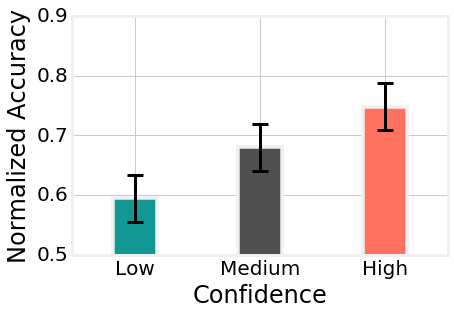

In [5]:
plt.style.use('fivethirtyeight')

acc_mean = np.nanmean(acc, axis=0)
perc_mean = np.nanmean(perc, axis=0)
yerr=scipy.stats.sem(acc, axis=0, nan_policy='omit')[0] * 1.96
fig, ax = plt.subplots()
colors  = np.array([[18., 151., 147.],[80., 80., 80.],[255., 114., 96.]])/255
# ax.grid()
ax.set_axisbelow(True)
for conf in xrange(3):
    ax.bar(conf+1-.35/2,acc_mean[conf],.35,color=colors[conf],linewidth=3.5,yerr=yerr,
          error_kw=dict(elinewidth=3, ecolor='k',capsize=8,capthick=3))
ax.set_xlabel('Confidence',fontsize=24)
ax.set_ylabel('Normalized Accuracy',fontsize=24)
# plt.xticks(range(1,4), ('Low (%.2f)'%(perc_mean[0]),
#                         'Medium (%.2f)'%(perc_mean[1]),
#                         'High (%.2f)'%(perc_mean[2])),fontsize=18,rotation=45)
plt.xticks(range(1,4), ('Low', 'Medium','High'),fontsize=20)
plt.yticks(np.arange(.5,.91,.1))
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.ylim(.5,.9)
ax.set_axis_bgcolor('white')
fig.set_facecolor('white')
# plt.savefig('/home1/jfm2/th_acc_bar.pdf',facecolor=fig.get_facecolor(),bbox_inches='tight')

In [6]:
from scipy.stats import ttest_1samp
ts, ps = ttest_1samp(acc,.5,nan_policy='omit')
ts
print(ts)

[4.671958231360232 9.400425519198429 10.603630371335349]


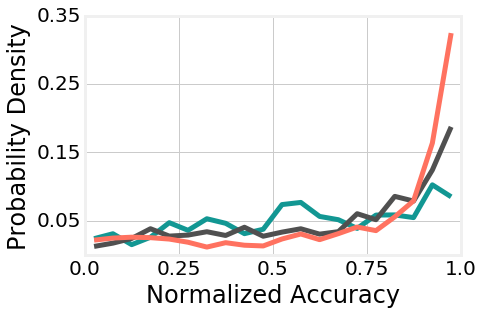

In [10]:
# %matplotlib inline


fig, ax = plt.subplots()
colors  = np.array([[18., 151., 147.],[80., 80., 80.],[255., 114., 96.]])/255
# ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel('Normalized Accuracy',fontsize=24)
ax.set_ylabel('Probability Density',fontsize=24)
# plt.xticks(range(1,4), ('Low (%.2f)'%(perc_mean[0]),
#                         'Medium (%.2f)'%(perc_mean[1]),
#                         'High (%.2f)'%(perc_mean[2])),fontsize=18,rotation=45)
plt.xlim(0,1)
plt.xticks(np.arange(0,1.01,.25), np.arange(0,1.01,.25),fontsize=20)
plt.ylim(0,.35)
plt.yticks(np.arange(.05,.36,.1), np.arange(.05,.36,.1),fontsize=20)
# plt.xticks(np.arange(0,1.01,.2), np.arange(0,1.01,.2),fontsize=18)
# plt.setp(ax.get_yticklabels(), fontsize=18)
# plt.ylim(.5,.9)


hists = np.nanmean(hist,axis=2)
bins=np.linspace(.025,.975,20)
colors  = np.array([[18., 151., 147.],[80., 80., 80.],[255., 114., 96.]])/255
for i in range(3):
    ax.plot(bins,hists[:,i][::-1], linewidth=5, color=colors[i])
# ax.invert_xaxis()
# plt.show()
ax.set_axis_bgcolor('white')
fig.set_facecolor('white')
plt.savefig('/home1/jfm2/th_acc_hist.pdf',facecolor=fig.get_facecolor(),bbox_inches='tight')

In [ ]:
np.arange(0,1,.2)

In [ ]:
for subj in enc_mono.subjs:
# for subj in ['R1076D']:
    others = enc_mono.compute_feature_heatmap_elecs(subjs=[subj],plot_uni=True)
    save_file = '/home1/jfm2/TH_elec_by_freq_plots/' + subj + '_mono.pdf'
    plt.savefig(save_file, bbox_inches = 'tight')

In [ ]:
others_arr = np.concatenate(others,-1)
uniq_regions = np.unique(others_arr)
counts = np.zeros(len(uniq_regions))
for i, r in enumerate(uniq_regions):
    counts[i] = np.sum(others_arr == r)
order = np.argsort(counts)[::-1]
fig, ax = plt.subplots()
ax.bar(np.arange(len(counts)),counts[order],color=[.7,.7,.7])
_=ax.set_xticks(np.arange(len(counts))+.4)
_=ax.set_xticklabels(uniq_regions[order],rotation=-90,fontsize=14)
ax.set_ylabel('Electrode Count',fontsize=16)
_=ax.set_yticklabels(ax.get_yticks().astype(int), fontsize=14)
plt.savefig('/home1/jfm2/other_elecs.pdf', bbox_inches = 'tight')

In [ ]:
np.array([[-1.0,0],[-0.5,.5],[0,1.0]])

In [ ]:
colors = matplotlib.cm.ScalarMappable(cmap='RdBu_r').to_rgba(subj_res['univar_ts'])
colors[:,2,:]*255

In [ ]:
(np.random.random((60, 4)) * 255).astype(np.uint8)

In [ ]:
freqs = np.logspace(np.log10(1),np.log10(200),50)
enc=TH_Classify.ClassifyTH(freqs=freqs)
enc.subjs = [subj for subj in enc.subjs if subj != 'R1234D']
enc.subjs = [subj for subj in enc.subjs if subj != 'R1237C']
enc.run_classify_for_all_subjs()

In [ ]:
# for subj in enc_mono.subjs:
#     print(subj)
_,im=enc_mono.compute_feature_heatmap(cv_type=['loso','loso'],plot_uni=True,hemi='both')
fig = plt.gcf()
fig.set_size_inches(18, 6)
# im.set_clim(vmin=-5,vmax=5)
plt.savefig('/home1/jfm2/loso_biomarker_univar_monopol.pdf',bbox_inches = 'tight')

In [ ]:
enc_mono.res[9]['chan_tags']

In [ ]:
full_time_axis = np.round(enc.res[0]['time_bin'] * 1000) / 1000

In [ ]:
enc=TH_Classify.ClassifyTH(test='test',hahahah=2,freqs=3)

In [ ]:
import ram_data_helpers

In [ ]:
events = ram_data_helpers.load_subj_events('RAM_TH1', 'R1076D')

In [ ]:
events['confidence'] > 0

In [ ]:
ram_data_helpers.load_subj_events.__name__

In [11]:
freqs = np.logspace(np.log10(1),np.log10(200),50)

with cluster_helper.cluster.cluster_view(scheduler="sge", queue="RAM.q", num_jobs=100,
                                         cores_per_job=1, 
                                         extra_params={"resources": "h_vmem=10G"}) as pool:    

    enc_bipol=TH_Classify.ClassifyTH(freqs=freqs,pool=pool)
#     enc_mono.subjs = [subj for subj in enc_mono.subjs if subj != 'R1234D']
#     enc_mono.subjs = [subj for subj in enc_mono.subjs if subj != 'R1237C']
    enc_bipol.run_classify_for_all_subjs()

23 Engines running
Processing R1076D.
Classifier exists for R1076D. Skipping.
Processing R1124J.
Classifier exists for R1124J. Skipping.
Processing R1133C.
Classifier exists for R1133C. Skipping.
Processing R1145J.
Classifier exists for R1145J. Skipping.
Processing R1147P.
Classifier exists for R1147P. Skipping.
Processing R1154D.
Classifier exists for R1154D. Skipping.
Processing R1155D.
Classifier exists for R1155D. Skipping.
Processing R1155D_1.
Classifier exists for R1155D_1. Skipping.
Processing R1155D_2.
Classifier exists for R1155D_2. Skipping.
Processing R1156D.
Classifier exists for R1156D. Skipping.
Processing R1157C.
Classifier exists for R1157C. Skipping.
Processing R1160C.
Classifier exists for R1160C. Skipping.
Processing R1163T.
Classifier exists for R1163T. Skipping.
Processing R1167M.
Classifier exists for R1167M. Skipping.
Processing R1168T.
Classifier exists for R1168T. Skipping.
Processing R1170J.
power features do not exist or overwriting for R1170J. Creating.
Erro

In [ ]:
feature_hm,im=enc_bipol.compute_feature_heatmap(cv_type=['lolo','loso'],plot_uni=False)
ax = plt.gca()
ax.grid()
# im.set_clim(vmin=-3.2,vmax=3.2)
fig = plt.gcf()
fig.set_size_inches(18, 8)
# plot_data, p = ttest_1samp(feature_hm, 0, axis=2, nan_policy='omit')
_=plt.xticks(np.arange(10), ('IFG', 'MFG', 'SFG', 'MTL', 'Hipp', 'TC', 'IPC', 'SPC', 'OC', 'XX'),fontsize=20,rotation=0)
plt.ylabel('Frequency',fontsize=24)
_=plt.setp(ax.get_yticklabels(), fontsize=20)
# print(plt.gca().get_yticks)
plt.savefig('/home1/jfm2/th_features.pdf',facecolor=fig.get_facecolor(),bbox_inches='tight')

In [ ]:
sig = p<.01
plt.imshow(sig, interpolation='nearest', cmap='RdBu_r', vmin=-clim, vmax=clim, aspect='auto')
plt.gca().invert_yaxis()

In [ ]:
enc_bipol.print_res_table()

In [ ]:
plot_data, best_time, best_window = enc.plot_triangle(cv_type=['loso','loso'])
clim = np.abs(np.array([np.nanmin(plot_data), np.nanmax(plot_data)]) - .5).max()
plt.clim(.5 - clim, .5 + clim)

In [ ]:
freqs = np.logspace(np.log10(1),np.log10(200),8)

with cluster_helper.cluster.cluster_view(scheduler="sge", queue="RAM.q", num_jobs=100,
                                         cores_per_job=1, 
                                         extra_params={"resources": "h_vmem=10G"}) as pool:    

    enc=TH_ClassifyTriangle.ClassifyTH(freqs=freqs,
                                       recall_filter_func=ram_data_helpers.filter_events_to_recalled_just_median,
                                       rec_thresh=13.0,pool=pool)
    enc.run_classify_for_all_subjs()

In [ ]:
plot_data, best_time, best_window = enc.plot_triangle(cv_type=['loso','loso'])
clim = np.abs(np.array([np.nanmin(plot_data), np.nanmax(plot_data)]) - .5).max()
plt.clim(.5 - clim, .5 + clim)

In [ ]:
enc_bipol.aucs(cv_type=['loso']).mean()

In [ ]:
best_window

In [ ]:
np.nanmax(plot_data)

In [85]:
freqs = np.logspace(np.log10(1),np.log10(200),8)
starts = np.arange(-4.75,3.26,.1)
ends = starts+1.5
time_bins = np.stack([starts,ends],axis=1)

with cluster_helper.cluster.cluster_view(scheduler="sge", queue="RAM.q", num_jobs=100,
                                         cores_per_job=1, 
                                         extra_params={"resources": "h_vmem=10G"}) as pool:    

    enc=TH_ClassifyTriangle.ClassifyTH(freqs=freqs, start_time=-5.0, end_time=5.0,
                                       force_reclass=True,pool=pool)
    enc.time_bins = time_bins
    enc.run_classify_for_all_subjs()

33 Engines running
Processing R1076D.
Processing R1124J.
Processing R1133C.
Processing R1145J.
Processing R1147P.
Processing R1154D.
Processing R1155D.
Processing R1155D_1.
Processing R1155D_2.
Processing R1156D.
Processing R1157C.
Processing R1160C.
Processing R1163T.
Processing R1167M.
Processing R1168T.
Processing R1170J.
power features do not exist or overwriting for R1170J. Creating.
Error processing R1170J.
Processing R1170J_2.
Processing R1171M.
Processing R1172E.
Processing R1180C.
Processing R1182C.
Processing R1184M.
Processing R1188C.
Processing R1189M.
Processing R1190P.
Processing R1191J.
Processing R1192C.
Processing R1194E.
Processing R1195E.
Processing R1198M.
Processing R1201P.
Processing R1201P_1.
Processing R1202M.
Processing R1204T.
Processing R1207J.
Processing R1208C.
Processing R1210E.
Processing R1212P.
Processing R1215M.
Processing R1222M.
Processing R1231M.
Processing R1233E.
Processing R1234D.
Processing R1236J.
power features do not exist or overwriting for 

(81,)

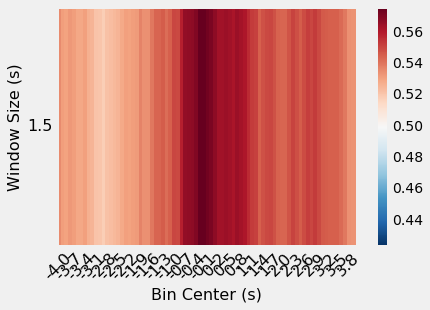

In [88]:
plot_data, best_time, best_window = enc.plot_triangle(cv_type=['loso','lolo'])
clim = np.abs(np.array([np.nanmin(plot_data), np.nanmax(plot_data)]) - .5).max()
plt.clim(.5 - clim, .5 + clim)
np.squeeze(plot_data.T).shape

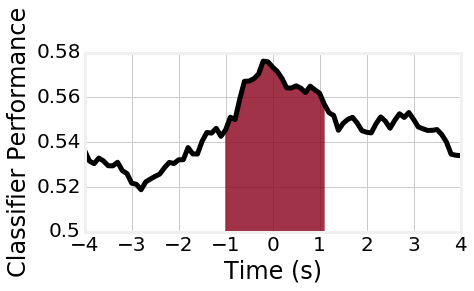

In [109]:
fig, ax = plt.subplots()

# ax.set_axisbelow(True)
ax.plot(time_bins.mean(axis=1), plot_data.T, color='k', linewidth=5)
ax.fill_between(time_bins.mean(axis=1), [.5]*81, np.squeeze(plot_data.T), where=ps<.05/81, 
                facecolor=[.54,0,.1], edgecolor=[.54,0,.1], alpha=.8)
# ax.fill_between(time_bins.mean(axis=1), [.5]*81, np.squeeze(plot_data.T), where=ps<.05, 
#                 facecolor=[1,0,.1], edgecolor=[1,0,.1])
# ax.fill_between(time_bins.mean(axis=1), [.5]*81, [.58]*81, where=ps<.001, 
#                 facecolor=[.54,0,.1], edgecolor=[.54,0,.1])
# ax.plot([0,0],[.48,.6],'--k',linewidth=3)
ax.set_xlabel('Time (s)',fontsize=24)
ax.set_ylabel('Classifier Performance',fontsize=24)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.yticks(np.arange(.5,6,.02), np.arange(.5,.6,.02),fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.ylim(.5,.58)
ax.set_axis_bgcolor('white')
fig.set_facecolor('white')
fig.set_size_inches(6,3)
plt.savefig('/home1/jfm2/TH_class_over_time_v2.pdf',facecolor=fig.get_facecolor(),bbox_inches = 'tight')

In [93]:
from scipy.stats import ttest_1samp
time_mean = time_bins.mean(axis=1)
ts, ps = ttest_1samp(aucs_all, .5, nan_policy='omit')
np.round(time_mean[ps < .05] * 10)/10

array([-4. , -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -2.1, -2. , -1.9,
       -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8,
       -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,  0.1,  0.2,  0.3,
        0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,
        1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,
        3.7,  3.8,  3.9,  4. ])

In [92]:
aucs_all = np.zeros((44,81))
aucs_all[:] = np.nan
for i, res in enumerate(enc.res):
#     if res['cv_type'] == 'loso':
    print(i)
    aucs_all[i,:] = res['aucs']

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [ ]:
res['aucs'].shape

In [ ]:
fig, ax = plt.subplots()

# ax.set_axisbelow(True)
ax.plot(time_bins.mean(axis=1), plot_data.T, color='k', linewidth=5)
ax.fill_between(time_bins.mean(axis=1), [.48]*81, np.squeeze(plot_data.T), where=ps<.05/81, 
                facecolor=[.54,0,.1], edgecolor=[.54,0,.1])
# ax.fill_between(time_bins.mean(axis=1), [.5]*81, np.squeeze(plot_data.T), where=ps<.05, 
#                 facecolor=[1,0,.1], edgecolor=[1,0,.1])
# ax.fill_between(time_bins.mean(axis=1), [.5]*81, [.58]*81, where=ps<.001, 
#                 facecolor=[.54,0,.1], edgecolor=[.54,0,.1])
ax.plot([0,0],[.48,.6],'--k',linewidth=3)
ax.set_xlabel('Time (s)',fontsize=24)
ax.set_ylabel('Classifier AUC',fontsize=24)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.yticks(np.arange(.5,6,.02), np.arange(.5,.6,.02),fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.ylim(.48,.58)
ax.set_axis_bgcolor('white')
fig.set_facecolor('white')
# plt.savefig('/home1/jfm2/TH_class_over_time.pdf',facecolor=fig.get_facecolor(),bbox_inches = 'tight')

In [ ]:
reload(SfN_2016.create_sfn_2016_figs)
xs,ys,zs, lobe, brain = SfN_2016.create_sfn_2016_figs.plot_all_elecs()

In [ ]:
fig, ax = plt.subplots()

# ax.set_axisbelow(True)
ax.plot(time_bins.mean(axis=1), plot_data.T, color='k', linewidth=5)
ax.fill_between(time_bins.mean(axis=1), [.5]*81, np.squeeze(plot_data.T), where=ps<.001, 
                facecolor=[.54,0,.1], edgecolor=[.54,0,.1])
# ax.fill_between(time_bins.mean(axis=1), [.5]*81, np.squeeze(plot_data.T), where=ps<.05, 
#                 facecolor=[1,0,.1], edgecolor=[1,0,.1])
# ax.fill_between(time_bins.mean(axis=1), [.5]*81, [.58]*81, where=ps<.001, 
#                 facecolor=[.54,0,.1], edgecolor=[.54,0,.1])
ax.plot([0,0],[.5,.6],'--k',linewidth=3)
ax.set_xlabel('Time (s)',fontsize=24)
ax.set_ylabel('Classifier AUC',fontsize=24)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.yticks(np.arange(.5,6,.02), np.arange(.5,.6,.02),fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.ylim(.5,.58)
ax.set_axis_bgcolor('white')
fig.set_facecolor('white')

In [ ]:
brain.save_image('/home1/jfm2/left_th_elecs.png')

In [ ]:
brain_surf = brain.brain_matrix[0]
for h in brain_surf:
    if h.hemi == 'lh':
        h._geo_surf.actor.property.opacity = .4
    if h.hemi == 'rh':
        h._geo_surf.actor.property.opacity = 0
#         # needed to show figure?
#         # mlab.show()

#     def set_brain_opacity(self, lh_opacity=1, rh_opacity=1):
#         # probably a better what to do this
#         for h in self.brain_surf:
#             if h.hemi == 'lh':
#                 h._geo_surf.actor.property.opacity = lh_opacity
#             elif h.hemi == 'rh':
#                 h._geo_surf.actor.property.opacity = rh_opacity

In [ ]:
brain.show_view({'azimuth': 180, 'elevation': 90}, roll=90)

In [ ]:
a=np.sort(np.concatenate(ys,-1)[lobe=='Parietal Lobe'])

In [ ]:
lobe.shape

In [ ]:
best_time

In [ ]:
# %gui qt
# from guidata import qthelpers
import SfN_2016.create_sfn_2016_figs
# reload(SfN_2016.create_sfn_2016_figs)
# from guidata import qthelpers
SfN_2016.create_sfn_2016_figs.plot_class_res_on_brain(enc_bipol)

In [ ]:
import cPickle as pickle
with open('/home1/jfm2/th.p', 'wb') as output:
    pickle.dump(enc_bipol.res, output, -1)

In [ ]:
import dill
with open('/home1/jfm2/th.pkl', 'wb') as f:
    dill.dump(enc_bipol.res, f)

In [ ]:
dill.dump_session('/scratch/jfm2/dill.pkl')

In [ ]:
dill.__version__

In [ ]:
dill.__file__

In [ ]:
enc_bipol.__dict__

In [ ]:
# %gui qt
# from guidata import qthelpers
import SfN_2016.create_sfn_2016_figs
reload(SfN_2016.create_sfn_2016_figs)
# from guidata import qthelpers
lh,rh = SfN_2016.create_sfn_2016_figs.plot_class_res_on_brain(enc_bipol)

In [ ]:
# reload(SfN_2016.create_sfn_2016_figs)
lh,rh = SfN_2016.create_sfn_2016_figs.plot_class_res_on_brain(enc_bipol,enc_bipol.freqs>30)
with open('/home1/jfm2/th_high.p', 'wb') as output:
    pickle.dump({'lh': lh, 'rh': rh}, output, -1)

In [ ]:
enc_bipol.freqs<12

In [ ]:
%matplotlib inline
feature_hm,im=enc_bipol.compute_feature_heatmap(cv_type=['lolo','loso'],hemi='left',plot_uni=False)
ax = plt.gca()
# ax.grid()
# im.set_clim(vmin=-3.2,vmax=3.2)
fig = plt.gcf()
fig.set_size_inches(18, 8)
# plot_data, p = ttest_1samp(feature_hm, 0, axis=2, nan_policy='omit')
_=plt.xticks(np.arange(10), ('IFG', 'MFG', 'SFG', 'MTL', 'Hipp', 'TC', 'IPC', 'SPC', 'OC', 'XX'),fontsize=20,rotation=0)
plt.ylabel('Frequency',fontsize=24)
_=plt.setp(ax.get_yticklabels(), fontsize=20)
# print(plt.gca().get_yticks)

In [ ]:
%matplotlib inline
feature_hm,im=enc_bipol.compute_feature_heatmap(cv_type=['lolo','loso'],hemi='right',plot_uni=False)
ax = plt.gca()
# ax.grid()
# im.set_clim(vmin=-3.2,vmax=3.2)
fig = plt.gcf()
fig.set_size_inches(18, 8)
# plot_data, p = ttest_1samp(feature_hm, 0, axis=2, nan_policy='omit')
_=plt.xticks(np.arange(10), ('IFG', 'MFG', 'SFG', 'MTL', 'Hipp', 'TC', 'IPC', 'SPC', 'OC', 'XX'),fontsize=20,rotation=0)
plt.ylabel('Frequency',fontsize=24)
_=plt.setp(ax.get_yticklabels(), fontsize=20)
# print(plt.gca().get_yticks)

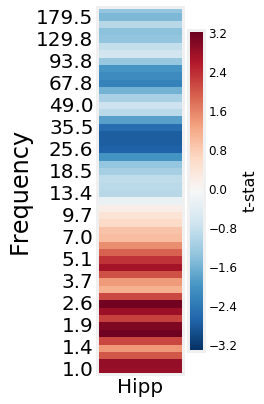

In [17]:
%matplotlib inline
plt.style.use('fivethirtyeight')
feature_hm,im=enc_bipol.compute_feature_heatmap(cv_type=['lolo','loso'],hemi='both',plot_uni=False,regions=(['Hipp']))
ax = plt.gca()
ax.grid()
# im.set_clim(vmin=-3.2,vmax=3.2)
fig = plt.gcf()
fig.set_size_inches(2, 8)
# plot_data, p = ttest_1samp(feature_hm, 0, axis=2, nan_policy='omit')
_=plt.xticks(np.arange(1), ['Hipp'],fontsize=20,rotation=0)
plt.ylabel('Frequency',fontsize=24)
_=plt.setp(ax.get_yticklabels(), fontsize=20)
# print(plt.gca().get_yticks)
plt.xlim(-.5,.5)
ax.set_axis_bgcolor('white')
fig.set_facecolor('white')
# plt.savefig('/home1/jfm2/hipp_50.pdf',facecolor=fig.get_facecolor(),bbox_inches='tight')

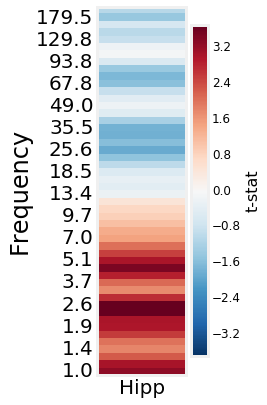

In [39]:
%matplotlib inline
plt.style.use('fivethirtyeight')
feature_hm,im=enc_bipol.compute_feature_heatmap(cv_type=['lolo','loso'],hemi='left',plot_uni=True,regions=(['Hipp']))
ax = plt.gca()
ax.grid()
im.set_clim(vmin=-3.7,vmax=3.7)
fig = plt.gcf()
fig.set_size_inches(2, 8)
# plot_data, p = ttest_1samp(feature_hm, 0, axis=2, nan_policy='omit')
_=plt.xticks(np.arange(1), ['Hipp'],fontsize=20,rotation=0)
plt.ylabel('Frequency',fontsize=24)
_=plt.setp(ax.get_yticklabels(), fontsize=20)
# print(plt.gca().get_yticks)
plt.xlim(-.5,.5)
ax.set_axis_bgcolor('white')
fig.set_facecolor('white')
# plt.savefig('/home1/jfm2/hipp_50_left.pdf',facecolor=fig.get_facecolor(),bbox_inches='tight')

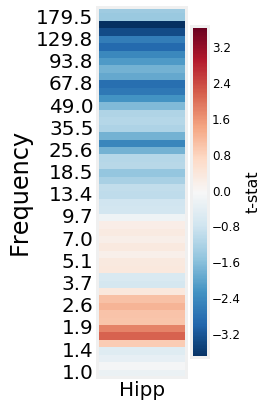

In [40]:
%matplotlib inline
plt.style.use('fivethirtyeight')
feature_hm,im=enc_bipol.compute_feature_heatmap(cv_type=['lolo','loso'],hemi='right',plot_uni=True,regions=(['Hipp']))
ax = plt.gca()
ax.grid()
im.set_clim(vmin=-3.7,vmax=3.7)
fig = plt.gcf()
fig.set_size_inches(2, 8)
# plot_data, p = ttest_1samp(feature_hm, 0, axis=2, nan_policy='omit')
_=plt.xticks(np.arange(1), ['Hipp'],fontsize=20,rotation=0)
plt.ylabel('Frequency',fontsize=24)
_=plt.setp(ax.get_yticklabels(), fontsize=20)
# print(plt.gca().get_yticks)
plt.xlim(-.5,.5)
ax.set_axis_bgcolor('white')
fig.set_facecolor('white')
# plt.savefig('/home1/jfm2/hipp_50_right.pdf',facecolor=fig.get_facecolor(),bbox_inches='tight')

In [36]:
np.sum(~np.isnan(feature_hm[:,0,:]),axis=1)

array([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16])

In [ ]:
enc16.print_res_table()

In [ ]:
feature_hm,im=enc16.compute_feature_heatmap(cv_type=['lolo','loso'],hemi='both',plot_uni=True)

ax.grid()
# im.set_clim(vmin=-3.2,vmax=3.2)
fig = plt.gcf()
# fig.set_size_inches(2, 8)
# plot_data, p = ttest_1samp(feature_hm, 0, axis=2, nan_policy='omit')
# _=plt.xticks(np.arange(1), ['Hipp'],fontsize=20,rotation=0)
# plt.ylabel('Frequency',fontsize=24)
# _=plt.setp(ax.get_yticklabels(), fontsize=20)
# print(plt.gca().get_yticks)
# plt.xlim(-.5,.5)
ax.set_axis_bgcolor('white')
fig.set_facecolor('white')

In [ ]:
feature_hm.shape

In [ ]:
y=np.nanmean(feature_hm[:,5,:],axis=1)
from scipy.stats import ttest_1samp
ts,ps = ttest_1samp(feature_hm[:,5,:],0,axis=1,nan_policy='omit')

plt.plot(np.log10(enc16.freqs),ts,color='k',linewidth=5)
# _=plt.xticks(range(len(enc16.freqs))[::4], (np.round(enc16.freqs * 10) / 10)[::4], fontsize=16, rotation=-45)
x = np.log10(np.array([1,2,4,8,16]))
_=plt.xticks(x, [1,2,4,8,16], fontsize=16, rotation=0)
ax = plt.gca()
fig = plt.gcf()
ax.set_xlabel('Frequency (Hz)',fontsize=24)
ax.set_ylabel('t-stat',fontsize=24)
plt.setp(ax.get_xticklabels(), fontsize=20)
# plt.yticks(np.arange(.5,6,.02), np.arange(.5,.6,.02),fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.xlim(0,np.log10(16))
plt.ylim(-1,4)
ax.set_axis_bgcolor('white')
fig.set_facecolor('white')
# plt.savefig('/home1/jfm2/TH_class_over_time.pdf',facecolor=fig.get_facecolor(),bbox_inches = 'tight')

# ax.fill_between(np.log10(enc16.freqs), [0]*50, ts, where=(ps<.05) & (ps>0.01), 
#                 facecolor=[.8,0.4,.2], edgecolor=[.8,0.4,.2], alpha=.8)

# ax.fill_between(np.log10(enc16.freqs), [0]*50, ts, where=(ps<.01), 
#                 facecolor=[.54,0,.1], alpha=.8)

ax.fill_between(np.log10(enc16.freqs), [0]*50, ts, where=(ps<.01), 
                facecolor=[.54,0,.1], edgecolor=[.54,0,.1], alpha=.8)
plt.plot([0,np.log10(16)],[0,0],'--k',linewidth=3)

# ax.set_axis_bgcolor('white')
# fig.set_facecolor('white')
plt.savefig('/home1/jfm2/tc_theta.pdf',facecolor=fig.get_facecolor(),bbox_inches='tight')

In [ ]:
ps

In [ ]:
ts.max()

In [ ]:
ps<.05

In [ ]:
enc16.freqs[ps<.05]

In [ ]:
enc16.freqs[ps<.05]

In [ ]:
y

In [ ]:
np.log10(enc16.freqs).shape

In [ ]:
ps

In [ ]:
(ps<.05).shape

In [ ]:
enc_bipol.print_res_table()

In [ ]:
plt.scatter(enc_bipol.aucs(),enc16.aucs())

In [ ]:
plt.scatter(enc16.aucs(),enc_high.aucs())
plt.ylim(0,1)
plt.xlim(0,1)
plt.plot([0,1],[0,1],'-k',linewidth=1)

In [ ]:
np.mean(enc_bipol.aucs()-enc16.aucs())

In [ ]:
ts,ps = ttest_1samp(enc16.aucs()-enc_high.aucs(),0)

In [ ]:
ts

In [ ]:
ps

In [ ]:
subj_res = enc_bipol.res[28]
loc_dict = ram_data_helpers.bin_elec_locs(subj_res['loc_tag'], subj_res['anat_region'], subj_res['chan_tags'])
A = subj_res['univar_ts']
feats = A[loc_dict['TC'],:]
clim = 4
order=np.argsort(np.argmax(feats,axis=1))
plt.imshow(feats[order].T, interpolation='nearest', vmin=-clim, vmax=clim, cmap='RdBu_r', aspect='auto')
plt.gca().invert_yaxis()
plt.gca().grid()

ax = plt.gca()
_=ax.set_yticks(range(len(enc_bipol.freqs))[::3])
_=ax.set_yticklabels((np.round(enc_bipol.freqs * 10) / 10)[::3], fontsize=16)

In [ ]:
# subj_res = enc16.res[28]
for subj_res in enc16.res:
    
    g, ax = plt.subplots(1, 1)
    loc_dict = ram_data_helpers.bin_elec_locs(subj_res['loc_tag'], subj_res['anat_region'], subj_res['chan_tags'])
    A = subj_res['univar_ts']
    feats = A[loc_dict['TC'],:]
    clim = 4
    if feats.shape[0] > 0:
        clim = np.max(np.abs([np.nanmin(feats), np.nanmax(feats)]))
    order=np.argsort(np.argmax(feats,axis=1))
    im=plt.imshow(feats[order].T, interpolation='nearest', vmin=-clim, vmax=clim, cmap='RdBu_r', aspect='auto')
    plt.gca().invert_yaxis()
    plt.gca().grid()

    ax = plt.gca()

    from scipy.interpolate import interp1d
    x = np.arange(50)
    y=np.logspace(np.log10(1), np.log10(16), 50)
    f = interp1d(y,x)
    newy = f(np.array([1,2,4,8,16]))

    _=ax.set_yticks(newy)
    _=ax.set_yticklabels([1,2,4,8,16], fontsize=20)

#     ax.set_ylabel('Frequency', fontsize=24)
    ax.set_xticks([])
#     ax.set_xlabel('Electrode', fontsize=24)

    ax.set_axis_bgcolor('white')
    fig = plt.gcf()
    fig.set_facecolor('white')
#     cb = fig.colorbar(im)
#     plt.title(subj_res['subj'])
    fig.set_size_inches(6,4)
    plt.savefig('/home1/jfm2/TH_SME_theta/' + subj_res['subj'] + '_TC.pdf',facecolor=fig.get_facecolor(),bbox_inches='tight')

In [ ]:
# subj_res = enc16.res[28]
for subj_res in enc16.res:
    
    g, ax = plt.subplots(1, 1)
    loc_dict = ram_data_helpers.bin_elec_locs(subj_res['loc_tag'], subj_res['anat_region'], subj_res['chan_tags'])
    A = subj_res['univar_ts']
    feats = A[loc_dict['Hipp'],:]
    clim = 4
    if feats.shape[0] > 0:
        clim = np.max(np.abs([np.nanmin(feats), np.nanmax(feats)]))
    order=np.argsort(np.argmax(feats,axis=1))
    im=plt.imshow(feats[order].T, interpolation='nearest', vmin=-clim, vmax=clim, cmap='RdBu_r', aspect='auto')
    plt.gca().invert_yaxis()
    plt.gca().grid()

    ax = plt.gca()

    from scipy.interpolate import interp1d
    x = np.arange(50)
    y=np.logspace(np.log10(1), np.log10(16), 50)
    f = interp1d(y,x)
    newy = f(np.array([1,2,4,8,16]))

    _=ax.set_yticks(newy)
    _=ax.set_yticklabels([1,2,4,8,16], fontsize=20)

#     ax.set_ylabel('Frequency', fontsize=24)
    ax.set_xticks([])
#     ax.set_xlabel('Electrode', fontsize=24)

    ax.set_axis_bgcolor('white')
    fig = plt.gcf()
    fig.set_facecolor('white')
#     cb = fig.colorbar(im)
#     plt.title(subj_res['subj'])
    fig.set_size_inches(6,4)
    plt.savefig('/home1/jfm2/TH_SME_theta/' + subj_res['subj'] + '_Hipp.pdf',facecolor=fig.get_facecolor(),bbox_inches='tight')

In [ ]:
enc16.print_res_table()

In [ ]:
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
font

In [ ]:
np.where(np.array(enc16.subjs) == 'R1171M')

In [ ]:
enc16.subjs

In [41]:
sessions = 0
for subj_res in enc16.res:
    sessions += np.unique(subj_res['sessions']).shape[0]

NameError: name 'enc16' is not defined

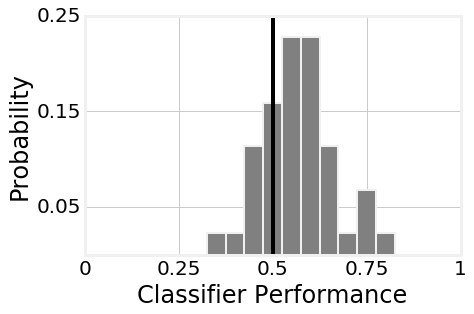

In [70]:
fig, ax = plt.subplots()
enc_bipol.plot_auc_hist()
# colors  = np.array([[18., 151., 147.],[80., 80., 80.],[255., 114., 96.]])/255
# ax.grid()
ax.set_axisbelow(True)

ax.set_xlabel('Classifier Performance',fontsize=24)
ax.set_ylabel('Probability',fontsize=24)

plt.xticks([0,.25,.5,.75,1], [0,.25,.5,.75,1],fontsize=20)
plt.yticks([.05,.15,.25], [.05,.15,.25],fontsize=20)
# plt.yticks(np.arange(.5,.91,.1))
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.xlim(0,1)

# plt.plot([.5, .5], [0, .25],'-', color=[.54,0,.1])
plt.plot([.5, .5], [0, .25],'-', color='k', zorder=1)
ax.set_axis_bgcolor('white')
fig.set_facecolor('white')
plt.savefig('/home1/jfm2/th_auc_hist.pdf',facecolor=fig.get_facecolor(),bbox_inches='tight')

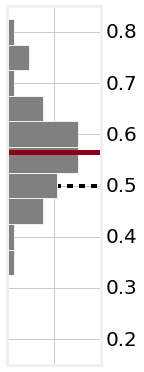

In [148]:
fig, ax = plt.subplots()
hist = np.histogram(enc_bipol.aucs(), np.linspace(0.025, .975, 20))
plt.barh(np.linspace(0.05, .95, 19), hist[0].astype(np.float) / np.sum(hist[0]), .05, align='center',
                color=[.5, .5, .5], linewidth=1, zorder=2)

ax.set_axisbelow(True)

# ax.set_ylabel('Classifier Performance',fontsize=24)
# ax.set_xlabel('Probability',fontsize=36)

plt.yticks([0,.25,.5,.75,1], [0,.25,.5,.75,1],fontsize=20)
plt.yticks(np.linspace(.2,.8,7),np.linspace(.2,.8,7),fontsize=20)
plt.xticks([.15], [],fontsize=20)
ax.yaxis.tick_right()
# plt.yticks([])
# plt.yticks(np.arange(.5,.91,.1))
# plt.setp(ax.get_yticklabels(), fontsize=26)
# plt.setp(ax.get_xticklabels(), fontsize=26)
plt.ylim(.15,.85)
plt.xlim(0,.3)

# plt.plot([.5, .5], [0, .25],'-', color=[.54,0,.1])
plt.plot([0,.3], [.5, .5],'--', color='k', zorder=1)
m = enc_bipol.aucs().mean()
plt.plot([0,.3], [m]*2,'-', color=[.54,0,.1], zorder=2, linewidth=5)
ax.set_axis_bgcolor('white')
fig.set_facecolor('white')

fig.set_size_inches(1.5,6)
plt.savefig('/home1/jfm2/th_auc_hist_v3.pdf',facecolor=fig.get_facecolor(),bbox_inches='tight')

0.56630900620834401

In [151]:
ps.min()

1.2278344636849054e-06